IMPORTING NECESSARY PACKAGES   

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
from IPython.display import display, clear_output
import time
import numpy as np

DEFINING REQUIRED VARIABLES

In [2]:

IMG_DIR = "dataset/images"
ANNOT_DIR = "dataset/annotations"
OUTPUT_DIR = "output/annotated_images"

os.makedirs(OUTPUT_DIR, exist_ok=True)

DISPLAY_ONLY = "all" 
SAVE_ANNOTATED_IMAGES = True
DELAY = 1  
TARGET_SIZE = (224, 224) 


PREPROCESSING THE IMAGES TO A PARTICULAR SIZE

In [3]:
def preprocess_image(image, original_size):

    image_resized = cv2.resize(image, TARGET_SIZE)

    image_normalized = image_resized / 255.0
    orig_h, orig_w = original_size
    scale_x = TARGET_SIZE[0] / orig_w
    scale_y = TARGET_SIZE[1] / orig_h

    return image_normalized, scale_x, scale_y


DETECTING THE OBJECT AND CREATING COLORED BOXES

In [4]:
def show_image_with_boxes(img_path, annot_path, save_path=None):
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_h, original_w = image.shape[:2]

    try:
        tree = ET.parse(annot_path)
        root = tree.getroot()

        image_norm, scale_x, scale_y = preprocess_image(image_rgb, (original_h, original_w))
        image_display = (image_norm * 255).astype(np.uint8) 
        draw_flag = False

        for obj in root.findall('object'):
            name = obj.find('name').text

            if DISPLAY_ONLY != "all" and name != DISPLAY_ONLY:
                continue

            draw_flag = True

            box = obj.find('bndbox')
            xmin = int(float(box.find('xmin').text) * scale_x)
            ymin = int(float(box.find('ymin').text) * scale_y)
            xmax = int(float(box.find('xmax').text) * scale_x)
            ymax = int(float(box.find('ymax').text) * scale_y)

            color = (255 ,0 , 0) if name == "with_helmet" else (0, 255, 0)
            cv2.rectangle(image_display, (xmin, ymin), (xmax, ymax), color, 2)
            cv2.putText(image_display, name, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

        if draw_flag:
            plt.figure(figsize=(8, 6))
            plt.imshow(image_display)
            plt.axis('off')
            plt.title("Preprocessed (Resized & Normalized)")
            plt.show()

            if SAVE_ANNOTATED_IMAGES and save_path:
                cv2.imwrite(save_path, cv2.cvtColor(image_display, cv2.COLOR_RGB2BGR))

    except Exception as e:
        print(f"Error parsing {annot_path}: {e}")


RUNNING THE LOOP AROUND ALL THE IMAGES

Showing: BikesHelmets140.png


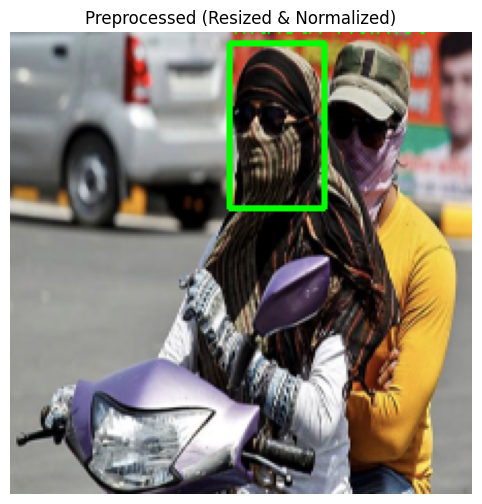


 Interrupted 


In [5]:

img_files = sorted(os.listdir(IMG_DIR))
annot_files = sorted(os.listdir(ANNOT_DIR))

try:
    for img_file, annot_file in zip(img_files, annot_files):
        img_path = os.path.join(IMG_DIR, img_file)
        annot_path = os.path.join(ANNOT_DIR, annot_file)
        save_path = os.path.join(OUTPUT_DIR, img_file)

        clear_output(wait=False)
        print(f"Showing: {img_file}")
        show_image_with_boxes(img_path, annot_path, save_path)
        time.sleep(DELAY)

except KeyboardInterrupt:
    print("\n Interrupted ")
